Load the data and print the first few rows of the to ensure it was loaded properly. 

In [52]:
import pandas as pd

file_path = '/home/ss4169/cs210/modeling/alzheimers_disease_data.csv'
alzheimers_data = pd.read_csv(file_path)

alzheimers_data.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,AlcoholConsumption,PhysicalActivity,DietQuality,...,MemoryComplaints,BehavioralProblems,ADL,Confusion,Disorientation,PersonalityChanges,DifficultyCompletingTasks,Forgetfulness,Diagnosis,DoctorInCharge
0,4751,73,0,0,2,22.927749,0,13.297218,6.327112,1.347214,...,0,0,1.725883,0,0,0,1,0,0,XXXConfid
1,4752,89,0,0,0,26.827681,0,4.542524,7.619885,0.518767,...,0,0,2.592424,0,0,0,0,1,0,XXXConfid
2,4753,73,0,3,1,17.795882,0,19.555085,7.844988,1.826335,...,0,0,7.119548,0,1,0,1,0,0,XXXConfid
3,4754,74,1,0,1,33.800817,1,12.209266,8.428001,7.435604,...,0,1,6.481226,0,0,0,0,0,0,XXXConfid
4,4755,89,0,0,0,20.716974,0,18.454356,6.310461,0.795498,...,0,0,0.014691,0,0,1,1,0,0,XXXConfid


Import sklearn packages for splitting the data into training and testing subsets, using the random forest, logistic regression, and support vector machine classifiers, and calculating evaluation metrics. 

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, classification_report

Import StandardScaler to normalize feature magnitudes. If this isn't used, we receive a UndefinedMetricWarning while training models later on, which means the models reach a point where further iterations have negligible effect. 

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

Drop columns irrelevant to training (PatientID and DoctorInCharge):

In [44]:
data_cleaned = alzheimers_data.drop(columns=['PatientID', 'DoctorInCharge'])

Divide the dataset into two components - the features (X) and the target variable (Y).

In [45]:
X = data_cleaned.drop(columns=['Diagnosis'])
y = data_cleaned['Diagnosis']

Scale the X data: 

In [46]:
X_scaled = scaler.fit_transform(X)

Split the data into training and testing subsets. Reserve 80% for training and 20% for testing:

In [47]:
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

Initialize the random forest, logistic regression, and support vector machine models. 

In [48]:
#key = name, value = model in models.items() 
#name is the model name, and the model is the corresponding model object 
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(max_iter=2000, class_weight='balanced', random_state=42),
    #Set class_weight='balanced' to help avoid undefined precision for certain classes. 
    #Undefined precision occurs if classes are imbalanced (predictions cannot be made for some classes) 
    "Support Vector Machine": SVC()
}

Train and evaluate the models. Calculate evaluation metrics (mean squared error, mean absolute error, r2) and generate a performance report.

In [49]:
model_results = {}
for name, model in models.items(): 
    
    #training 
    model.fit(X_train_scaled, y_train) #takes in training datasets for features and target variabels
    
    #generate predictions 
    y_pred_scaled = model.predict(X_test_scaled) 
    #predict() takes in X_test as input --> generates predictions for Y (diagnosed or not diagnosed) based on the features X 
    
    #evaluation  
    mse = mean_squared_error(y_test, y_pred_scaled) #compare the testing target vars with the predicted target vars 
    mae = mean_absolute_error(y_test, y_pred_scaled)
    r2 = r2_score(y_test, y_pred_scaled)
    
    report = classification_report(y_test, y_pred_scaled, zero_division=0, output_dict=True)
    #zero_division is set to 0 to handle cases of undefined precision  
    #classfication report is divided into classes (0 = No Alzheimer's, and 1 = Alzheimer's)
    
    model_results[name] = {
        "MSE": mse,
        "MAE": mae,
        "R2": r2,
        "Classification Report": report
    }
    
model_results

{'Random Forest': {'MSE': 0.07441860465116279,
  'MAE': 0.07441860465116279,
  'R2': 0.6753262074986432,
  'Classification Report': {'0': {'precision': 0.9096989966555183,
    'recall': 0.9819494584837545,
    'f1-score': 0.9444444444444444,
    'support': 277.0},
   '1': {'precision': 0.9618320610687023,
    'recall': 0.8235294117647058,
    'f1-score': 0.8873239436619719,
    'support': 153.0},
   'accuracy': 0.9255813953488372,
   'macro avg': {'precision': 0.9357655288621103,
    'recall': 0.9027394351242302,
    'f1-score': 0.9158841940532081,
    'support': 430.0},
   'weighted avg': {'precision': 0.9282486684118374,
    'recall': 0.9255813953488372,
    'f1-score': 0.9241201732357972,
    'support': 430.0}}},
 'Logistic Regression': {'MSE': 0.1813953488372093,
  'MAE': 0.1813953488372093,
  'R2': 0.20860763077794287,
  'Classification Report': {'0': {'precision': 0.8783269961977186,
    'recall': 0.8339350180505415,
    'f1-score': 0.8555555555555555,
    'support': 277.0},
   '

Now, generate visualizations (bar charts) of the results to easily compare the performance of the different models for each class. 

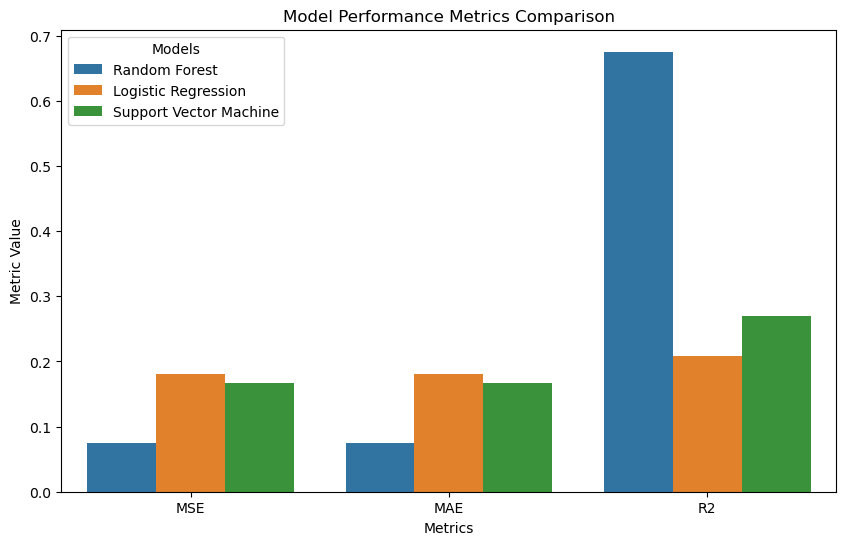

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# x axis will show metrics, y axis will show value, and legend will contain model names
metrics = ["MSE", "MAE", "R2"]
metric_data = {
    "Model": [],
    "Metric": [],
    "Value": []
}

for model_name, results in model_results.items(): #iterate through results for each model
    for metric in metrics: #iterating through MSE, MAE, and R2
        metric_data["Model"].append(model_name)
        metric_data["Metric"].append(metric)
        metric_data["Value"].append(results[metric])

#convert to df for plotting 
metric_df = pd.DataFrame(metric_data)


plt.figure(figsize=(10, 6))
sns.barplot(data=metric_df, x="Metric", y="Value", hue="Model")
plt.title("Model Performance Metrics Comparison")
plt.ylabel("Metric Value")
plt.xlabel("Metrics")
plt.legend(title="Models")
plt.show()

Plot classification report info. 
Separate support data from the rest (precision, recall, f1-score) as these two groups of information are scaled differently. 

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#classification report info for metrics besides support
class_report_data = {
    "Model": [],
    "Class": [],
    "Metric": [],
    "Value": []
}

#classification report info for support 
support_data = {
    "Model": [],
    "Class": [],
    "Support": []
}

for model_name, results in model_results.items():
    report = results["Classification Report"]
    for class_label, metrics in report.items():
        if class_label in ["accuracy", "macro avg", "weighted avg"]: #skip these metrics 
            continue
        for metric, value in metrics.items():
            if metric == "support":
                support_data["Model"].append(model_name)
                support_data["Class"].append(class_label)
                support_data["Support"].append(value)
            else: 
                class_report_data["Model"].append(model_name)
                class_report_data["Class"].append(class_label)
                class_report_data["Metric"].append(metric)
                class_report_data["Value"].append(value)

class_report_df = pd.DataFrame(class_report_data)
support_df = pd.DataFrame(support_data)

# plot classification metrics for precision, recall, f1-score)
plt.figure(figsize=(12, 8))
sns.barplot(
    data=class_report_df,
    x="Class",
    y="Value",
    hue="Model",
    palette="Set2",
    errorbar=None
)
plt.title("Classification Metrics for Each Class Across Models")
plt.ylabel("Metric Value")
plt.xlabel("Classes")
plt.legend(title="Models")
plt.show()

# plot support metrics 
plt.figure(figsize=(10, 6))
sns.barplot(
    data=support_df,
    x="Class",
    y="Support",
    hue="Model",
    palette="muted"
)
plt.title("Support for Each Class Across Models")
plt.ylabel("Support Value")
plt.xlabel("Classes")
plt.legend(title="Models")
plt.show()


Overall observations: 

MSE and MAE: RF < SVM < LR 

R2: LR < SVM < RF 

With regard to precision, recall, and F1-score, RF performs better than SVM which performs better than LR. 

Overall, Random Forest is most suited, Support Vector Machine is second most suited, and Logistic Regression is least suited for predicting diagnoses using the given dataset. 